<a href="https://colab.research.google.com/github/izmcm/machine-learning/blob/master/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 27.7MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import pandas as pd

In [0]:
url_filmes = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"

filmes = pd.read_csv(url_filmes)

filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos = filmes.genres.str.get_dummies()
#generos.head()

dados = pd.concat([filmes, generos], axis=1)
dados.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_generos = scaler.fit_transform(generos)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
# Escalando os filmes pelos gêneros que importam mais e criando grupos para agrupar filmes parecidos
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=17)
modelo.fit(scaler_generos)

print(f'Grupos {modelo.labels_}')

Grupos [10  5  7 ...  4 10 15]


In [0]:
# Transformando os grupos criados pelo KMeans em um DataFrame para construir um gráfico
gruposDf = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

gruposTranspose = gruposDf.transpose()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba96082dd8>,
      dtype=object)

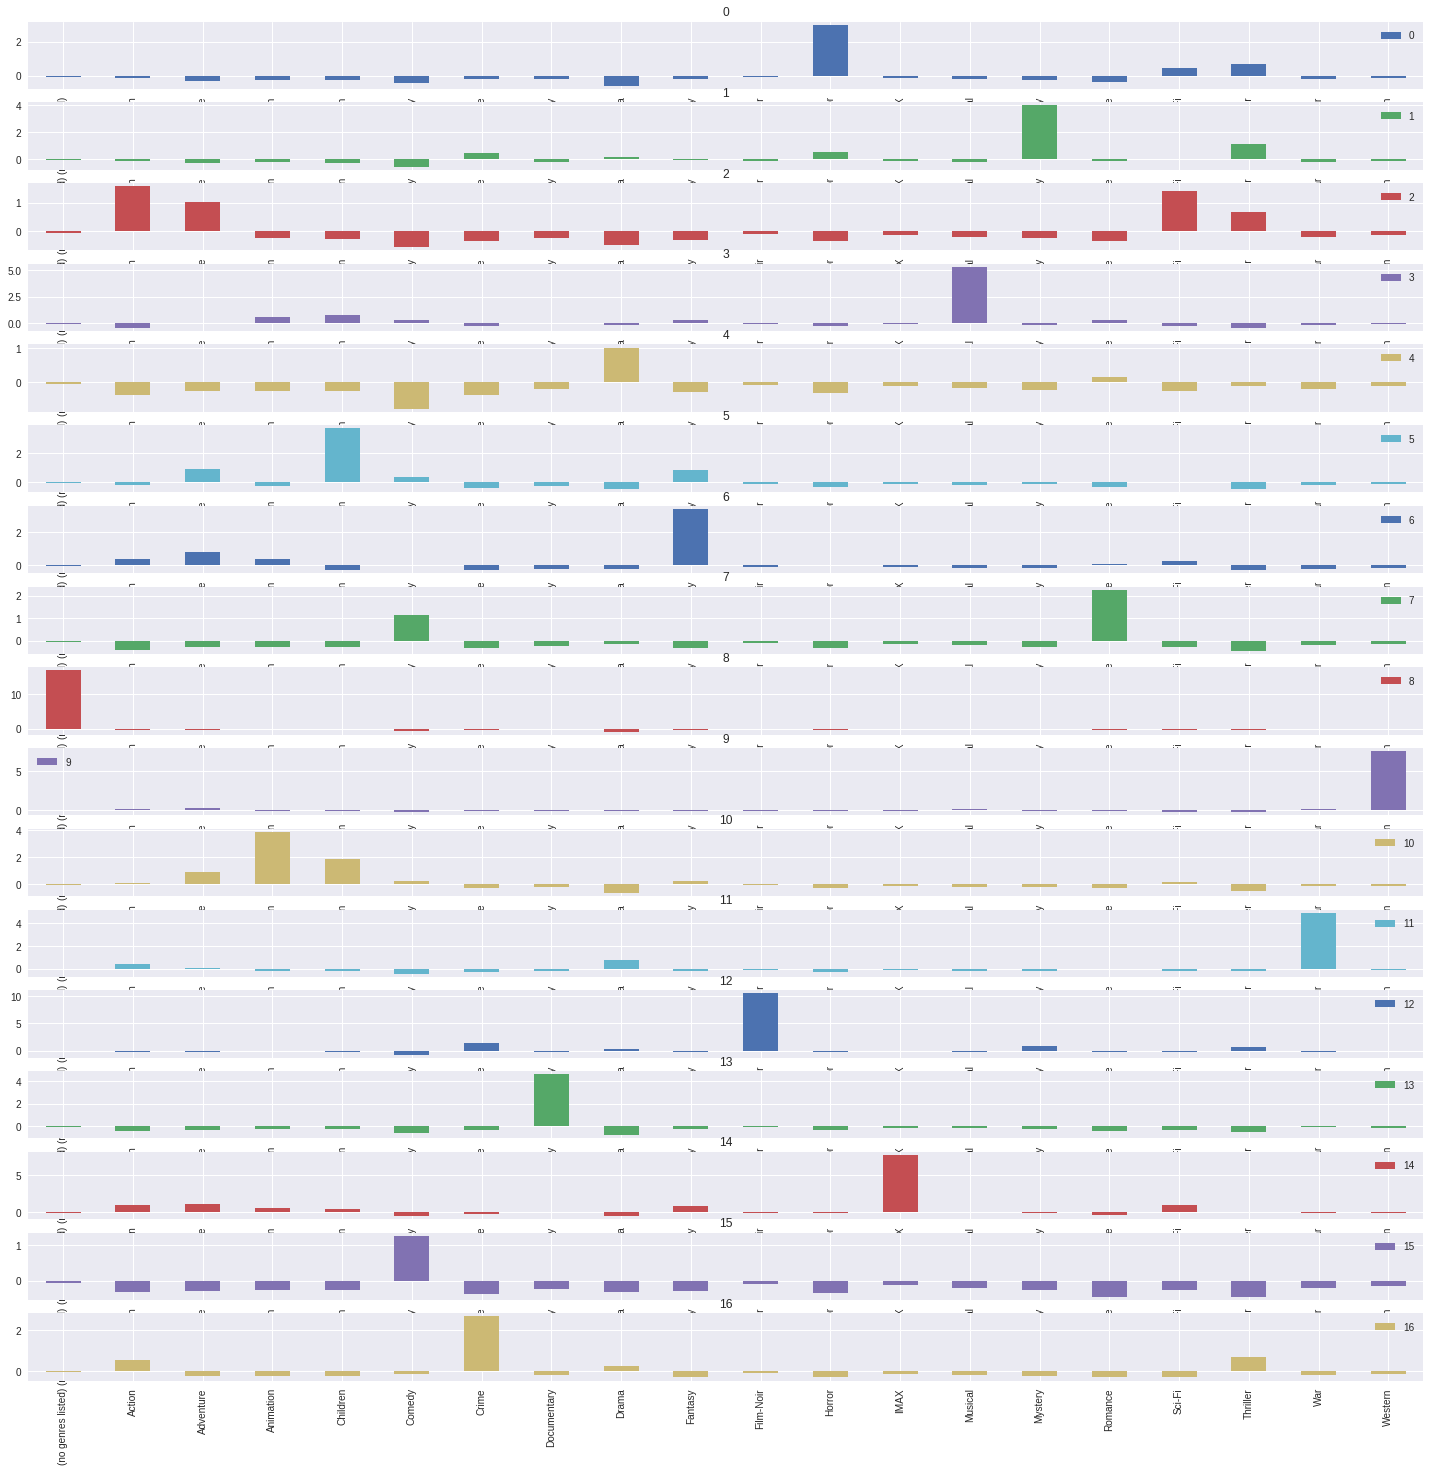

In [0]:
gruposTranspose.plot.bar(subplots=True,
                         figsize=(25, 25),
                         sharex=False)

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE()

visu = tsne.fit_transform(scaler_generos)

In [0]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(x=visu[: , 0],
               y = visu[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

AttributeError: ignored

In [0]:
def erro_kmeans(num, generos):
  modelo = KMeans(n_clusters=num)
  modelo.fit(generos)
  
  return [num, modelo.inertia_]

In [0]:
erro_kmeans(20, scaler_generos)

In [0]:
erro_kmeans(3, scaler_generos)